# Lab02: Gradient Descent.

- Student ID: 18120296
- Student name: Cao Tất Cường 

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle (**recommended compression format: zip**).

**Contents:**
- Gradient descent.

**Notes that**: this lab is prepared based on the book "Deep Learning for Computer Vision with Python" by Adrian Rosebrock.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [2]:
# generate a 2-class classification problem with 2,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
--> treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [3]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1 / (1 + np.exp(-x)) 

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    return x * (1 - x)


#### Compute output

In [4]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(X @ W)
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    preds = sigmoid_activation(X @ W)
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [5]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [6]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = trainX.T @ (error * sigmoid_deriv(h))
    return gradient

#### Training function 

In [7]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [8]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=986.6329548
Epoch=5, loss=975.7308381
Epoch=10, loss=514.5469637
Epoch=15, loss=489.7386633
Epoch=20, loss=488.3479044
Epoch=25, loss=487.6798242
Epoch=30, loss=487.2304321
Epoch=35, loss=486.8913371
Epoch=40, loss=486.6268315
Epoch=45, loss=486.4146285
Epoch=50, loss=486.2292684
Epoch=55, loss=486.0329567
Epoch=60, loss=485.7302697
Epoch=65, loss=484.6631103
Epoch=70, loss=1.0843560
Epoch=75, loss=1.0242622
Epoch=80, loss=0.9955961
Epoch=85, loss=0.9805654
Epoch=90, loss=0.9706586
Epoch=95, loss=0.9625587
Epoch=100, loss=0.9551076


#### Evaluate result

In [9]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**TODO: Study about accuracy, recall, precision, f1-score.**
<img src=https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg alt="Confusion matrix" width="500" height="600">
Nguồn: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix

**Trong đó**
- True Positive (TP): Số mẫu mang nhãn dương được phân lớp đúng vào lớp dương.
- True Negative (TN): Số mẫu mang nhãn âm được phân lớp đúng vào lớp âm.
- False Positive (FP):  Số mẫu mang nhãn âm bị phân lớp sai vào lớp dương.
- False Negative (FN): Số mẫu mang nhãn dương bị phân lớp sai vào lớp âm.
FP và FN đôi khi còn được gọi dưới những cái tên khác trong thống kê là Sai lầm loại I (Type I error) và Sai lầm loại II (Type II error).

**Các phương pháp đánh giá một hệ thống phân lớp**
- $Accuracy = \frac{TP\space +\space TN}{TP\space +\space TN\space +\space FP +\space FN}$                         
Accuracy là tỉ lệ giữa số điểm được phân loại đúng và tổng số điểm. Accuracy chỉ phù hợp với các bài toán mà kích thước các lớp dữ liệu là tương đối như nhau.
- $Recall = \frac{TP}{TP\space +\space FN}$                                                                       
Trong tất cả các trường hợp Positive, bao nhiêu trường hợp đã được dự đoán chính xác.
- $Precision= \frac{TP}{TP\space +\space FP}$   
Trong tất cả các dự đoán Positive được đưa ra, bao nhiêu dự đoán là chính xác.
- $F{_1}= 2 \times \frac{Precision\space \times\space Recall}{Precision\space +\space Recall}$  
$F{_1}$ Score là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh gía độ chính xác trên đồng thời precision và recall.
- Ví dụ về Precision và Recall: khi ta làm về mô hình phân lớp video cho trẻ em (video tích cực hay tiêu cực) thì model có thể loại bỏ các video tích cực nếu xác suất video đó thuộc về 2 lớp là gần như nhau đồng nghĩa với low recall, model chỉ giữ lại các video chắc chắn là tích cực (xác suất video đó thuộc về lớp tích cực cao) đồng nghĩa với high precision. Ở một ví dụ khác, khi ta làm mô hình phân lớp tội phạm buôn ma túy thì ta sẽ muốn high recall (dự đoán được hết các tội phạm) kiểu như "***thà bắt nhầm còn hơn bỏ sót***".

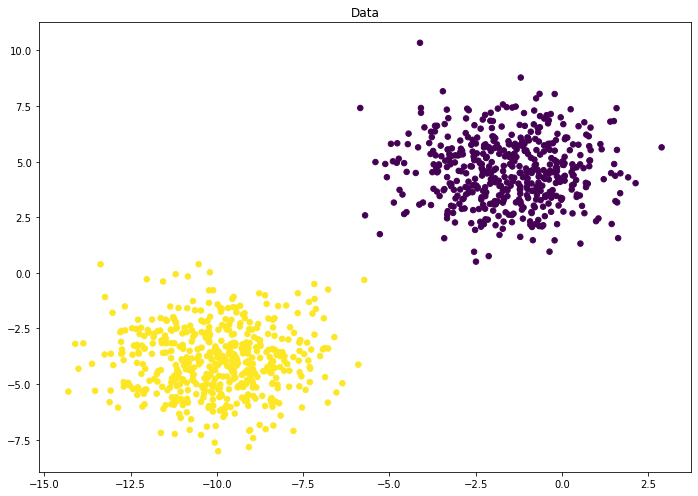

In [10]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

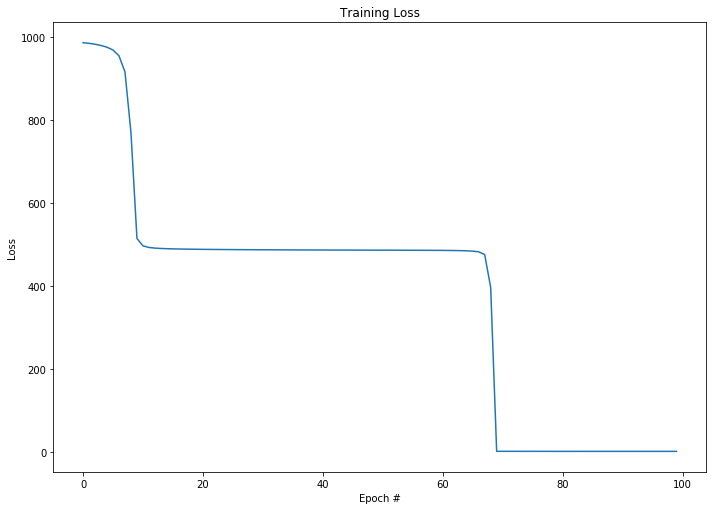

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observations**

In [12]:
W1 = np.random.randn(X.shape[1], 1)
losses = []
num_epochs=100
learning_rate1=0.00001
W1=train(W1,trainX, trainY, learning_rate1, num_epochs)
preds = predict(W1, testX)

Epoch=1, loss=60.9638191
Epoch=5, loss=55.4165093
Epoch=10, loss=49.7553455
Epoch=15, loss=45.1913170
Epoch=20, loss=41.4680314
Epoch=25, loss=38.3953633
Epoch=30, loss=35.8316650
Epoch=35, loss=33.6705654
Epoch=40, loss=31.8314127
Epoch=45, loss=30.2524182
Epoch=50, loss=28.8857433
Epoch=55, loss=27.6939628
Epoch=60, loss=26.6475040
Epoch=65, loss=25.7227740
Epoch=70, loss=24.9007794
Epoch=75, loss=24.1660988
Epoch=80, loss=23.5061096
Epoch=85, loss=22.9104026
Epoch=90, loss=22.3703327
Epoch=95, loss=21.8786721
Epoch=100, loss=21.4293405


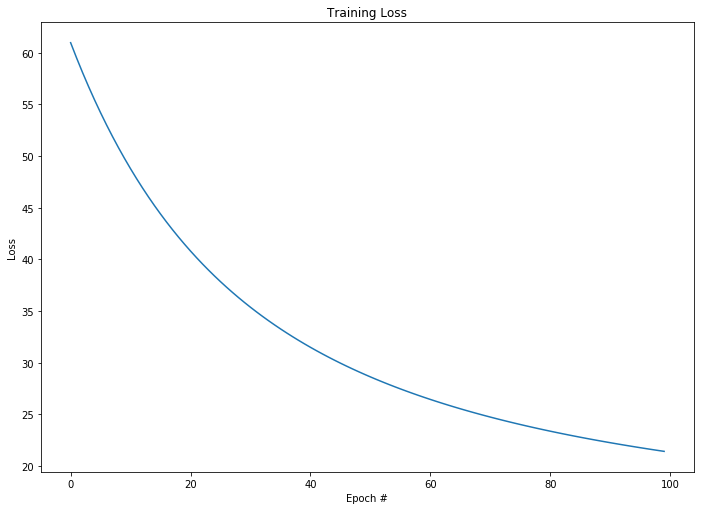

In [13]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

Ta thấy với `learning rate = 0.00001` thì tốc độ hội tụ rất chậm nên cần rất nhiều vòng lặp. Ta thấy thuật toán thuật toán dừng lại trước khi tới đích. Khi learning rate quá thấp sẽ ảnh hưởng tới tốc độ của thuật toán rất nhiều, thậm chí không bao giờ tới được đích.

In [14]:
W2 = np.random.randn(X.shape[1], 1)
losses = []
num_epochs=100
learning_rate2=0.9
W2=train(W2,trainX, trainY, learning_rate2, num_epochs)
preds = predict(W2, testX)

Epoch=1, loss=444.6064919
Epoch=5, loss=161.9296155
Epoch=10, loss=134.5935776
Epoch=15, loss=118.9793268
Epoch=20, loss=118.5796952
Epoch=25, loss=100.2707123
Epoch=30, loss=83.9388950
Epoch=35, loss=72.4144656
Epoch=40, loss=53.1660091
Epoch=45, loss=46.9834348
Epoch=50, loss=46.9101997
Epoch=55, loss=45.0290538
Epoch=60, loss=45.0075331
Epoch=65, loss=45.0032535
Epoch=70, loss=45.0010438
Epoch=75, loss=44.9993889
Epoch=80, loss=44.9977916
Epoch=85, loss=44.9958537
Epoch=90, loss=44.9927945
Epoch=95, loss=44.9855230
Epoch=100, loss=44.9306479


/home/cuong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


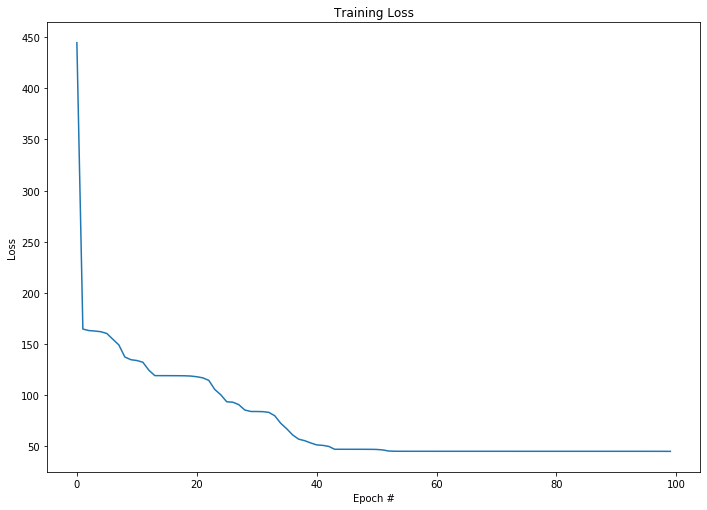

In [15]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

Với `learning rate = 0.9` có thể  một vài vòng lặp đâu tiên hội tụ rất nhanh. Tuy nhiên, thuật toán không hội tụ được vì bước nhảy quá lớn, khiến nó cứ quanh quẩn ở đích.